In [14]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
from keras import Input, Model

In [3]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)

In [10]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

In [12]:
X_train.shape , X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [20]:
input_image = Input(shape=(28,28,1)) 

x = Conv2D(filters=16, kernel_size=(3,3),activation='relu',padding='same')(input_image)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(filters=8, kernel_size=(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(filters=8, kernel_size=(3,3),activation='relu',padding='same')(x)
encoded = MaxPooling2D(pool_size=(2,2), padding='same')(x)

x = Conv2D(filters=8, kernel_size=(3,3),activation='relu',padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(filters=8, kernel_size=(3,3),activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(filters=16, kernel_size=(3,3),activation='relu')(x)
x = UpSampling2D((2,2))(x)

decoded = Conv2D(filters=1, kernel_size=(3,3),activation='sigmoid',padding='same')(x)

autoencoder = Model(input_image, decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')


In [25]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 8)           584 

In [22]:
autoencoder.fit(X_train,X_train,epochs=10,batch_size=256, shuffle=True, validation_data=(X_test,X_test))

Epoch 1/10
235/235 [==============================] - 18s 75ms/step - loss: 0.1401 - val_loss: 0.1327
Epoch 2/10
235/235 [==============================] - 18s 75ms/step - loss: 0.1303 - val_loss: 0.1257
Epoch 3/10
235/235 [==============================] - 16s 69ms/step - loss: 0.1246 - val_loss: 0.1210
Epoch 4/10
235/235 [==============================] - 16s 66ms/step - loss: 0.1204 - val_loss: 0.1179
Epoch 5/10
235/235 [==============================] - 15s 66ms/step - loss: 0.1173 - val_loss: 0.1156
Epoch 6/10
235/235 [==============================] - 16s 68ms/step - loss: 0.1148 - val_loss: 0.1127
Epoch 7/10
235/235 [==============================] - 16s 68ms/step - loss: 0.1129 - val_loss: 0.1111
Epoch 8/10
235/235 [==============================] - 16s 68ms/step - loss: 0.1113 - val_loss: 0.1094
Epoch 9/10
235/235 [==============================] - 18s 75ms/step - loss: 0.1098 - val_loss: 0.1083
Epoch 10/10
235/235 [==============================] - 17s 71ms/step - loss: 0.108

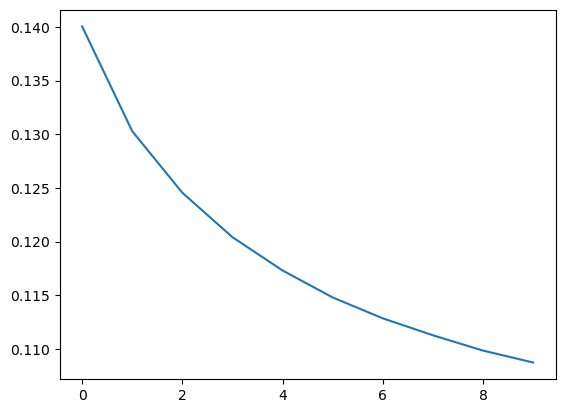

In [23]:
loss_per_epoch = autoencoder.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [28]:
pred = autoencoder.predict(X_test)

313/313 [==============================] - 2s 5ms/step


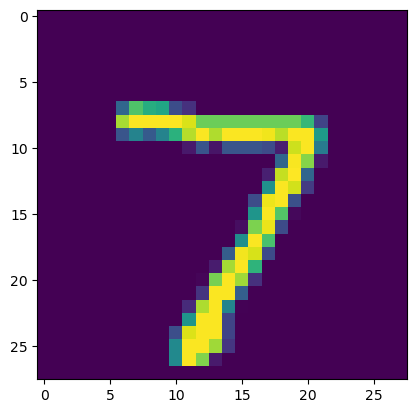

In [34]:
plt.imshow(X_test[0])

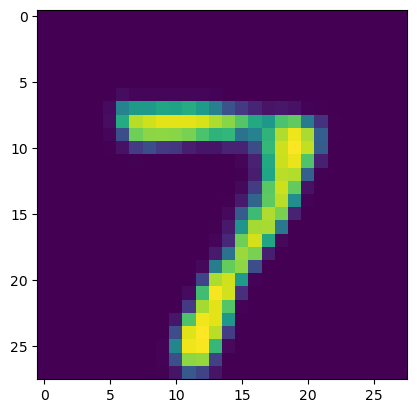

In [35]:
plt.imshow(pred[0])